`Lab creado por Margarita Geleta para el curso Introducción a Machine Learning JEDI, edición 2021`

# [XII] Redes Neuronales

### O más formalmente, Redes Neuronales Artificiales (*Artificial Neural Network*, ANN).

Seguro que todos han oido hablar alguna vez sobre "redes neuronales".

### ¿Tienen algo que ver con neuronas, con el cerebro o con el sistema nervioso?

Muchas fuentes (en Medium y etc.) dicen que sí, que la idea viene de imitar el funcionamiento de los tejidos neuronales de los organismos vivos pero en realidad el enfoque biológico no es especialmente útil para entender las ANNs. 

### ¿Qué es pues una red neuronal?

Una red neuronal es una aproximador universal de cualquier función $f$. El teorema universal de aproximación (1991) demuestra que una red neuronal de una capa puede aproximar cualquier función contínua. El problema es que el teorema no dice cuantas neuronas deben de haber en la capa.

### ¿Qué es una neurona?

Es un "sumatorio" jaja. Es decir, una neurona es operación que calcula la similitud entre el vector de entrada y el vector de los parámetros. Considera que es un producto escalar. Combinamos el input con el vector de parámetros (que se debe optimizar). Una neurona también se conoce como "perceptron".

#### Así pues, una red neuronal es una composición de perceptrones en varias capas. Cada perceptron calcula una combinación lineal de las entradas y pasa el resultado a través de una función de activación.

### ¿Para qué necesitamos funciones de activación?

Claro, nosotros intentaremos aproximar funciones no lineales. Simplemente componer funciones lineales nos daría todo lineal. El poder de las redes está en que al usar las no linealidades de las funciones de activación, podemos aproximar cualquier función.

---

## Por cierto, ya hemos visto redes neuronales

**¿Dónde?** En regresión - el modelo lineal, el modelo polinómico ... En clasificación - el regressor logístico. Son de una capa y de una neurona.

---

### ¿Cómo se entrena una red neuronal?

Pues igual que el resto de los modelos. Se define una función de coste y se calcula el gradiente. Pero aquí, sería muy díficil calcular la derivada analíticamente, por eso se usa el algoritmo de *Backpropagation*. Dada una red neuronal y la función de coste, el algoritmo calcula el gradiente de la función de coste respecto todos los parámetros de la red. Calculados los gradientes parciales, actualizamos los parámetros para mejorar nuestro modelo. 

### ¿Qué es Deep Learning?

Deep Learning es un subcampo de Machine Learning que estudia más a fondo las redes neuronales, sus variantes y propiedades a medida que se complican. Es decir, al pasar la barrera de "ANN de una capa" entramos en Deep Learning.

### ¿Para qué añadir más capas?

Volviendo al teorema universal de aproximación (1991) que demuestra que una red neuronal de una capa puede aproximar cualquier función contínua - el teorema no dice cuantas neuronas deben de haber en la capa y lo que se ha llegado a ver empíricamente es que llegamos más fácilmente a nuestro objectivo añadiendo más capas que añadiendo más neuronas en una capa.

### ¿Qué tipos de redes neuronales hay?

Pues ... muchos.

- Los modelos básicos que hemos visto son Perceptrones. 
- Si vamos agrupando Perceptrones en capas (entrando ya en el campo de Deep Learning) creamos un Multi-Layer Perceptron (MLP). 
- Si en vez de calcular el producto escalar en los Perceptrones calculamos una distancia entre la entrada y el vector de parámetros de la neurona, tenemos Radial Basis Function Neural Networks (RBFNN).
- Si en vez de pasar entradas en forma de vector a la red, le pasamos directamente matrices, cubos, etc ... y aplicamos convoluciones - tenemos redes convolucionales.
- Si además tenemos en cuenta la temporalidad, llegamos a redes neuronales recurrentes (RNN).
- Y la lista sigue ... Pero eso ya es entrar en Deep Learning.

---
## Las redes neuronales datan de los años 40. 

Ahora vamos a ver una implementación del Perceptron de Rosenblatt (1958) - el primer Perceptron usado para clasificación.

In [1]:
class Rosenblatt_Perceptron(object):

    def __init__(self, eta = 1, epochs = 50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        R = 0
        
        for i in range(0,len(X)):
            norm = np.linalg.norm(X[i,])
            if R < norm: R = norm
                
        for i in range(self.epochs):
            errors = 0
            print('Weights at ', i ,': ', self.w_)
            
            for xi, yi in zip(X, y):
                if yi * (self.w_[1:].T @ xi + self.w_[0]) <= 0:
                    errors += 1
                    self.w_[1:] = self.w_[1:] + self.eta * yi * xi
                    self.w_[0] = self.w_[0] + self.eta * yi * R**2
                    
            self.errors_.append(errors)
            errors = 0
            
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
X, Y = load_iris(return_X_y = True)

Y = Y[0:100]
Y = np.where(Y == 0, -1, 1)

X = X[0:100, [0,2]]

Weights at  0 :  [0. 0. 0.]
Weights at  1 :  [0.  1.9 3.3]
Weights at  2 :  [0.  3.8 6.6]
Weights at  3 :  [0.  5.7 9.9]
Weights at  4 :  [ 0.   7.6 13.2]
Weights at  5 :  [ 0.   8.9 16.3]
Weights at  6 :  [ 0.   8.7 18.2]
Weights at  7 :  [ 0.   8.7 19.8]
Weights at  8 :  [-71.62   3.6   18.4 ]
Weights at  9 :  [-71.62   3.6   18.4 ]
Final weights :  [-71.62   3.6   18.4 ]


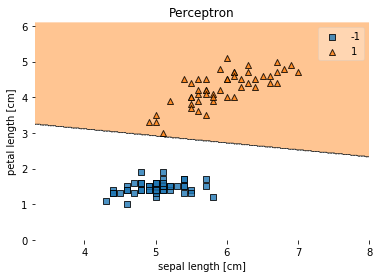

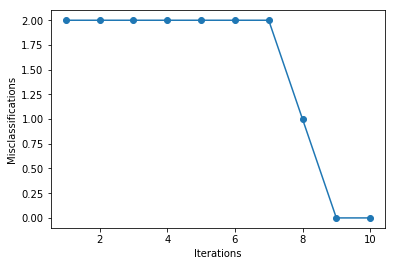

In [36]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

ppn = Rosenblatt_Perceptron(epochs = 10, eta = 1)

ppn.train(X, Y)
print('Final weights :  %s' % ppn.w_)
plot_decision_regions(X, Y, clf = ppn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

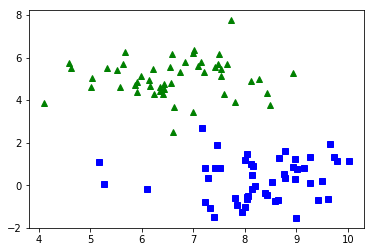

In [40]:
import matplotlib.pyplot as plt
from sklearn import datasets
X, y = datasets.make_blobs(n_samples = 100, centers = 2, n_features = 2, center_box  = (0, 10),
                          random_state = 99)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()
y[y == 0] = -1

Weights at  0 :  [0. 0. 0.]
Weights at  1 :  [  0.           3.91814113 -17.05217201]
Weights at  2 :  [  0.           5.11655509 -21.44973339]
Weights at  3 :  [  0.           6.31496905 -25.84729477]
Weights at  4 :  [  0.           7.51338301 -30.24485615]
Weights at  5 :  [  0.           8.71179697 -34.64241753]
Weights at  6 :  [  0.           9.91021093 -39.03997891]
Weights at  7 :  [  0.          11.10862489 -43.43754029]
Weights at  8 :  [  0.           9.8585302  -45.10650127]
Weights at  9 :  [  0.          11.05694416 -49.50406265]
Weights at  10 :  [  0.           9.66824928 -53.56545043]
Weights at  11 :  [  0.          10.18526823 -63.54702211]
Weights at  12 :  [119.95429788  17.49886259 -66.57495405]
Weights at  13 :  [119.95429788  15.6810811  -68.95104277]
Weights at  14 :  [119.95429788  14.2468616  -70.39430204]
Weights at  15 :  [119.95429788  12.8126421  -71.83756131]
Weights at  16 :  [119.95429788  11.3784226  -73.28082057]
Weights at  17 :  [119.95429788   8.6

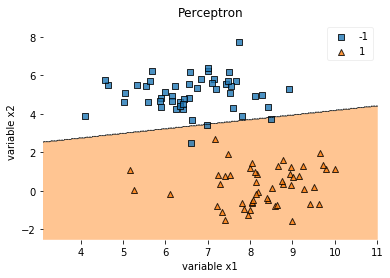

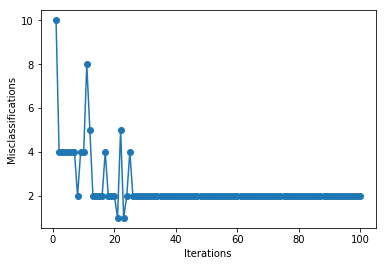

In [41]:
ppn = Rosenblatt_Perceptron(epochs = 100, eta = 1)

ppn.train(X, y)
print('Final weights :  %s' % ppn.w_)
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('variable x1')
plt.ylabel('variable x2')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()